In [13]:
import numpy as np
import pandas as pd
import os, shutil
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

try:
    !mkdir saved_model
    !mkdir saved_components
except Exception as e:
    print(e)

mkdir: cannot create directory ‘saved_model’: File exists
mkdir: cannot create directory ‘saved_components’: File exists


In [14]:
os.listdir(), os.listdir('churn_dataset/')

(['Churn_modeling.ipynb',
  'app.py',
  '.git',
  '__pycache__',
  'Preprocessed_churn_dataset.csv',
  '.gitignore',
  '.ipynb_checkpoints',
  'README.md',
  'test.py',
  '=4.2.0',
  'saved_components',
  'saved_model',
  'Static',
  'Untitled.ipynb',
  'Preprocess.py',
  'churn_dataset'],
 ['Churn_Modelling.csv'])

In [15]:
data = pd.read_csv('./churn_dataset/Churn_Modelling.csv')

In [16]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9149,9150,15814331,Lung,597,Germany,Female,43,7,119127.46,2,1,0,55809.92,0
4947,4948,15670354,Jen,753,France,Female,62,6,0.00,2,1,1,136398.90,0
1115,1116,15626608,Howarde,479,Spain,Male,48,5,87070.23,1,0,1,85646.41,0
8182,8183,15774402,Donaldson,562,Spain,Male,36,5,0.00,1,0,1,182843.24,0
7836,7837,15780492,Ignatyeva,648,France,Male,42,4,0.00,2,1,0,19283.14,0


In [17]:
data.shape

(10000, 14)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [20]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
# Surname, Rownumber and CustomerID does not have to do anything with response
X = data.drop(['Surname','RowNumber','CustomerId','Exited'],axis = 1)
y = data.Exited

In [22]:
# setting categorical and numerical columns
cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes('number').columns

In [23]:
cat_cols, num_cols

(Index(['Geography', 'Gender'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'))

## Column Transformer

In [24]:
# Encoding categorical values
X = data.drop(['Surname','RowNumber','CustomerId','Exited'],axis = 1)
y = data.Exited
ohe = OneHotEncoder(sparse=False)
scaler = MinMaxScaler()

In [25]:
coltrans = ColumnTransformer([('scaler', scaler, num_cols),
                             ('ohencoder', ohe, cat_cols)],remainder= 'passthrough'
                            )

In [30]:
# SAving columntransformer

joblib.dump(scaler, './saved_components/scaler.joblib')
joblib.dump(ohe, './saved_components/ohe.joblib')

In [27]:
feature_space = coltrans.fit_transform(X)

In [28]:
feature_space.shape

(10000, 13)

In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
# Converting to PD dataframe
names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary',1,2,3,'a','b']
df = pd.DataFrame(feature_space, columns=names)
df['exited'] = y

int_cols = ['HasCrCard','IsActiveMember', 1,2,3,'a','b', 'exited']
float_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i in int_cols:
    df[i] = df[i].astype('int16')
for j in float_cols:
    df[j] = df[j].astype('float32')
    

# Saving the preprocessed Data
df.to_csv('Preprocessed_churn_dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float32
 1   Age              10000 non-null  float32
 2   Tenure           10000 non-null  float32
 3   Balance          10000 non-null  float32
 4   NumOfProducts    10000 non-null  float32
 5   HasCrCard        10000 non-null  int16  
 6   IsActiveMember   10000 non-null  int16  
 7   EstimatedSalary  10000 non-null  float32
 8   1                10000 non-null  int16  
 9   2                10000 non-null  int16  
 10  3                10000 non-null  int16  
 11  a                10000 non-null  int16  
 12  b                10000 non-null  int16  
 13  exited           10000 non-null  int16  
dtypes: float32(6), int16(8)
memory usage: 390.8 KB


## Outlier removal

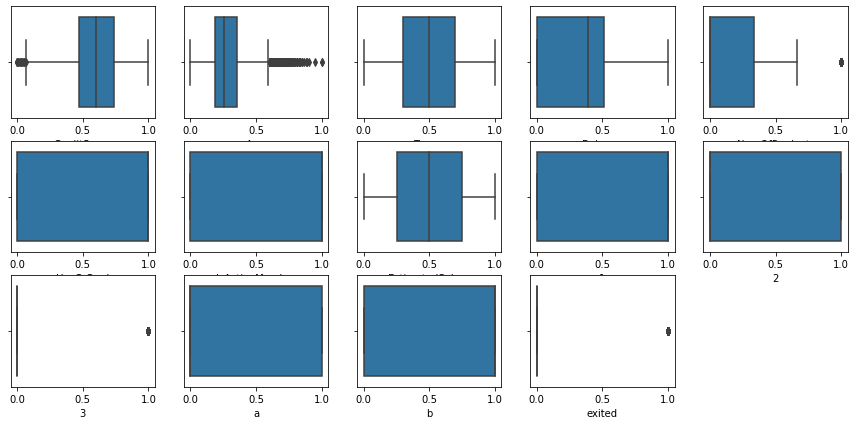

In [18]:
# Looking for outliers
plt.figure(figsize=(15,7))
i = 1
for col in df.columns:
    plt.subplot(3,5,i)
    sns.boxplot(data=df, x = col, hue = 'exited')
    i += 1

In [19]:
# Removing the Outliers

from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings('ignore')

out_rem = EllipticEnvelope(contamination=.1,random_state=33)
mask = out_rem.fit_predict(df)

In [20]:
mask = np.where(mask != 1,True, False)
df['isoutlier'] = mask

In [21]:
df_no_outlier = df[df.isoutlier == False]
df_no_outlier.drop('isoutlier',axis = 1, inplace=True)

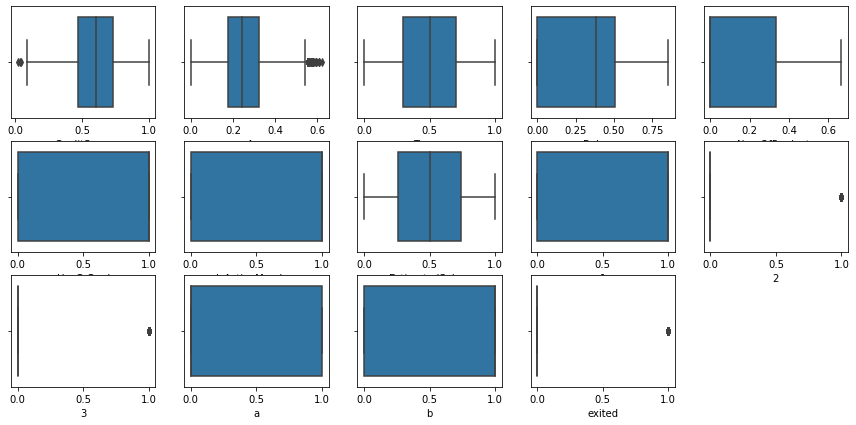

In [22]:
# Looking for outliers again to check the difference
plt.figure(figsize=(15,7))
i = 1
for col in df_no_outlier.columns:
    plt.subplot(3,5,i)
    sns.boxplot(data=df_no_outlier, x = col)
    i += 1

## Setting response and feature dataframe separate

In [23]:
XX = df_no_outlier.drop('exited', axis = 1)
yy = df_no_outlier.exited

## Checking for class imbalance

In [24]:
df_no_outlier.exited.value_counts()

0    7486
1    1514
Name: exited, dtype: int64

In [25]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()


# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(XX, yy)


print(f'Original data: X = {XX.shape}, {yy.shape}')
print(yy.value_counts())
print(f'Oversampled data: X = {x_smote.shape}, {y_smote.shape}')
print(y_smote.value_counts())


Original data: X = (9000, 13), (9000,)
0    7486
1    1514
Name: exited, dtype: int64
Oversampled data: X = (14972, 13), (14972,)
1    7486
0    7486
Name: exited, dtype: int64


## Creating train and test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_smote, y_smote, test_size=.1, random_state= 33)

In [28]:
xtrain.shape

(13474, 13)

## Creating a DL model

In [54]:
import os
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2' # ignores tf wanrings and red notes
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

#Enable Gpu
physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(len(physical_devices))


0


In [30]:
# Model intanciation
Model = keras.models.Sequential()
Model.add(Flatten())

# Model.add(keras.layers.Input(13))

Model.add(Dense( units = 100, activation = 'relu'))
# Model.add(Dropout(.2))

Model.add(Dense( units = 50, activation= 'relu'))
# Model.add(Dropout(.2))

Model.add(Dense( units = 30, activation= 'relu'))
# Model.add(Dropout(.2))

Model.add(Dense( units = 10, activation= 'relu'))


Model.add(Dense(units=1, activation='sigmoid'))

2022-06-27 05:18:28.446420: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-27 05:18:28.446870: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [31]:
METRICS = [
      # keras.metrics.TruePositives(name='tp'),
      # keras.metrics.FalsePositives(name='fp'),
      # keras.metrics.TrueNegatives(name='tn'),
      # keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [33]:
Model.compile(optimizer= keras.optimizers.Adam(), loss='binary_crossentropy', metrics = METRICS)

In [34]:
model_history = Model.fit(xtrain, ytrain, batch_size= 300, epochs= 300, validation_split=.1, verbose = 0)

2022-06-27 05:19:14.310589: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-27 05:19:14.332570: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz


In [35]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
______________________________________________________

In [36]:
dd = pd.DataFrame(model_history.history)
# dd.sort_values('val_precision', ascending=False)

In [37]:
# for i in dd.columns:
    
#     plt.plot(dd[i], label = i)
#     plt.legend()


In [38]:
to_plot = ['val_loss','val_accuracy','val_precision','val_recall', 'val_auc','val_prc']

In [39]:
import plotly.express as px

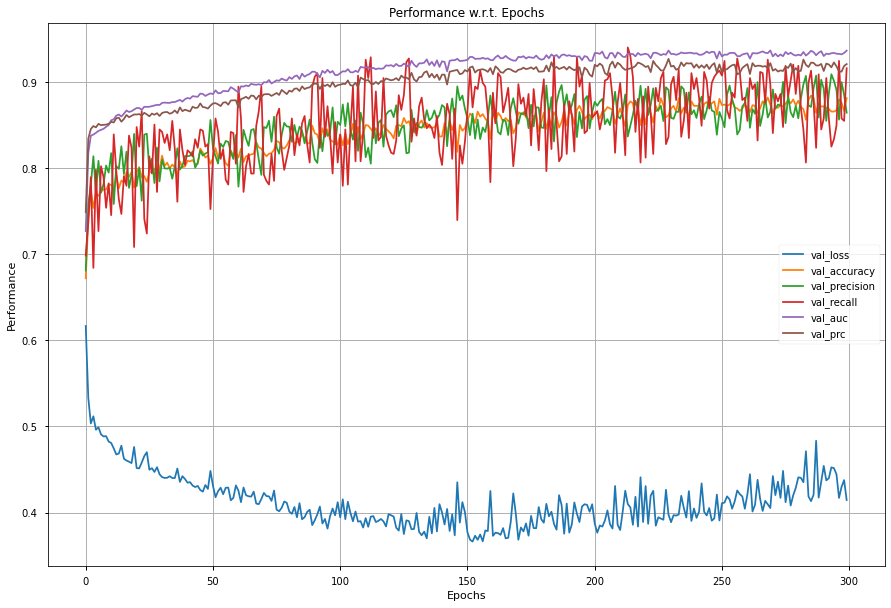

In [40]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-notebook')
plt.grid()

plt.title('Performance w.r.t. Epochs')
for i in to_plot:
    plt.plot(dd[i], label = i)
    plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.savefig('./Saved_components/Performance_Model.jpg', bbox_inches='tight')
plt.show()


In [41]:
from sklearn.metrics import  confusion_matrix

In [42]:
ypred = Model.predict(xtest)
ypred = np.around(ypred)

In [43]:
def all_metrics(y_true, y_pred, heatmap = True):
    from sklearn.metrics import f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix
    print('f1 score: ',f1_score(y_true, y_pred))
    print( 'precision score: ', precision_score(y_true, y_pred))
    print('recall score: ',recall_score(y_true,y_pred))
    auc = roc_auc_score(y_true, y_pred)
    print('AUC: %.3f' % auc)
    if heatmap:
        sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,cmap='Blues', fmt='g')
    else:
        print(confusion_matrix(y_true, y_pred))

f1 score:  0.8788839568801522
precision score:  0.837968561064087
recall score:  0.924
AUC: 0.872


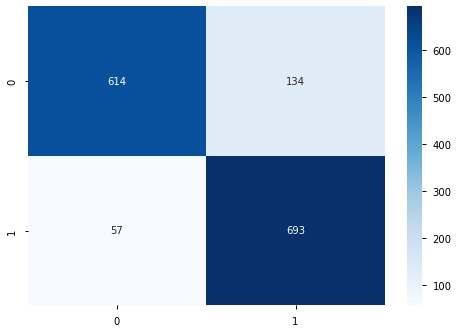

In [44]:
all_metrics(ytest,ypred)

## Saving the Model

In [45]:
# Saving the Model
Model.save('./saved_model/my_model.h5')


# Lets see other Model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log = LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [48]:
ypreddd = log.predict(xtest)

f1 score:  0.753968253968254
precision score:  0.7480314960629921
recall score:  0.76
AUC: 0.752


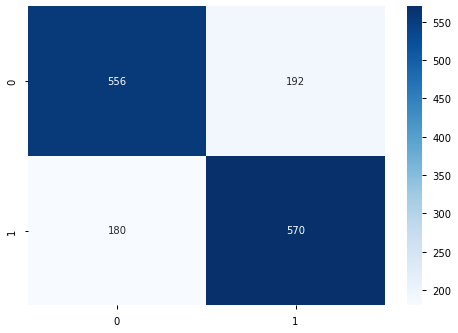

In [49]:
all_metrics(ytest,ypreddd)

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(xtrain, ytrain)

ExtraTreesClassifier()

In [51]:
extra_pred = extra.predict(xtest)

f1 score:  0.930628272251309
precision score:  0.9138817480719794
recall score:  0.948
AUC: 0.929


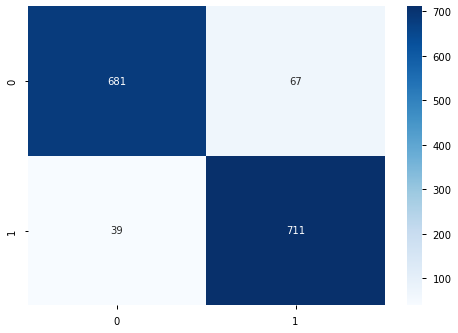

In [52]:
all_metrics(ytest, extra_pred)

# Tree wins